### Correlação e Regressão
- correlação: correspondência entre variáveis -- Correlação *NÃO* é Causa
- regressão: Previsões

- Cálculo da Covariância:

$$C(x,y) =  \frac {\Sigma ({xi}-\bar{x}) * ({yi} - \bar{y})}{n - 1}$$ 

- Coeficiente de Variação

$$Cr(x,y) = \frac {Cov(x,y)}{std(x) * std(y)}$$

- Coeficiente de Determinação

$$Cd(x, y) = Cr^2$$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
tamanho = np.array([30, 39, 49, 60])
preco = np.array([57000, 69000, 77000, 90000])

In [3]:
dataset = pd.DataFrame({'tamanho': tamanho, 'preco': preco})
dataset

,tamanho,preco
0,30,57000
1,39,69000
2,49,77000
3,60,90000


In [4]:
media_tamanho = dataset['tamanho'].mean()
media_preco = dataset['preco'].mean()
media_tamanho, media_preco

(44.5, 73250.0)

In [5]:
dp_tamanho = dataset['tamanho'].std()
dp_preco = dataset['preco'].std()
dp_tamanho, dp_preco

(12.922847983320086, 13865.424623862047)

### Correlação - cálculo manual

In [6]:
dataset['dif'] = (dataset['tamanho'] - media_tamanho) * (dataset['preco'] - media_preco)
dataset

,tamanho,preco,dif
0,30,57000,235625.0
1,39,69000,23375.0
2,49,77000,16875.0
3,60,90000,259625.0


In [7]:
soma_dif = dataset['dif'].sum()
soma_dif

535500.0

In [8]:
covariancia = soma_dif / (len(dataset) - 1)
covariancia

178500.0

In [9]:
coeficiente_correlacao = covariancia / (dp_tamanho * dp_preco)
coeficiente_correlacao

0.9962006267707775

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


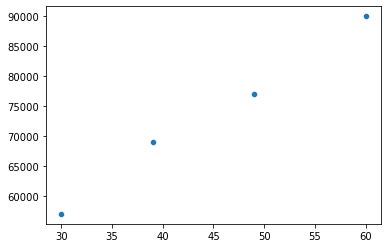

In [10]:
sns.scatterplot(tamanho, preco);

In [11]:
coeficiente_determinacao = math.pow(coeficiente_correlacao, 2)
coeficiente_determinacao

0.9924156887784898

### Cálculo com o Numpy e Pandas

In [12]:
# cálculo da covariância
np.cov(tamanho, preco)

array([[1.6700e+02, 1.7850e+05],
       [1.7850e+05, 1.9225e+08]])

In [13]:
# entendendo o formato do numpy
# mostra a covariância entre todos os atributos
dataset.cov()

,tamanho,preco,dif
tamanho,167.0,178500.0,1.850000e+05
preco,178500.0,192250000.0,1.612500e+08
dif,185000.0,161250000.0,1.735512e+10


In [14]:
# coeficiente de correlação
np.corrcoef(tamanho, preco)

array([[1.        , 0.99620063],
       [0.99620063, 1.        ]])

In [15]:
dataset.corr()

,tamanho,preco,dif
tamanho,1.000000,0.996201,0.108667
preco,0.996201,1.000000,0.088278
dif,0.108667,0.088278,1.000000


In [30]:

house = pd.read_csv("..\Bases de dados\house_prices.csv")
house

house.drop(labels = ['id', 'date', 'sqft_lot'], axis = 1, inplace=True)
house.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
house.cov().head(5)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.347824e+11,105286.276362,148481.495749,2.367154e+08,50908.003884,8460.643388,111772.969096,8687.030331,288026.499738,1.841014e+08,5.261406e+07,582448.362866,1.864486e+07,-1.045072e+06,15617.422517,1118.118066,1.472964e+08,8.264591e+08
bedrooms,1.052863e+05,0.865015,0.369527,4.925960e+02,0.088104,-0.000530,0.056684,0.017232,0.390254,3.678361e+02,1.247599e+02,4.212004,7.038678e+00,-7.597239e+00,-0.001151,0.016958,2.496518e+02,7.426446e+02
bathrooms,1.484815e+05,0.369527,0.593151,5.338120e+02,0.208211,0.004247,0.110800,-0.062638,0.602005,4.370876e+02,9.672443e+01,11.447333,1.569654e+01,-8.400840e+00,0.002622,0.024191,3.001611e+02,1.833182e+03
sqft_living,2.367154e+08,492.596040,533.811988,8.435337e+05,175.540402,8.249461,200.314304,-35.114601,823.407664,6.666978e+05,1.768358e+05,8580.237559,2.042442e+04,-9.800232e+03,6.685035,31.071084,4.761601e+05,4.596302e+06
floors,5.090800e+04,0.088104,0.208211,1.755404e+02,0.291588,0.001107,0.012184,-0.092686,0.290824,2.342603e+02,-5.871985e+01,7.761250,1.374814e+00,-1.708121e+00,0.003712,0.009538,1.035866e+02,-1.661524e+02


In [32]:
house.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
floors,0.256794,0.175429,0.500653,0.353949,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.605567,0.477600,0.685342,0.876597,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050


C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


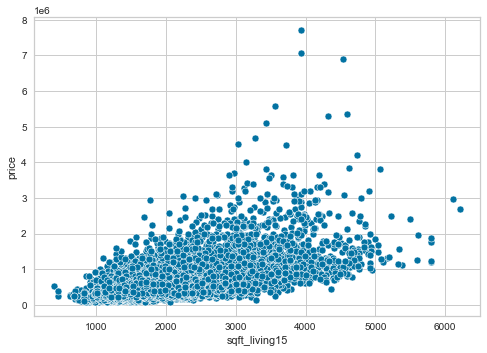

In [33]:
sns.scatterplot(house['sqft_living15'], house['price']);

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


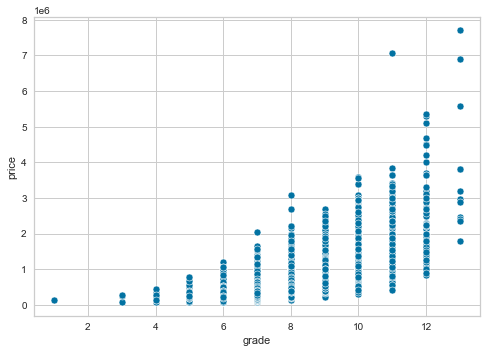

In [34]:
sns.scatterplot(house['grade'], house['price']);

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


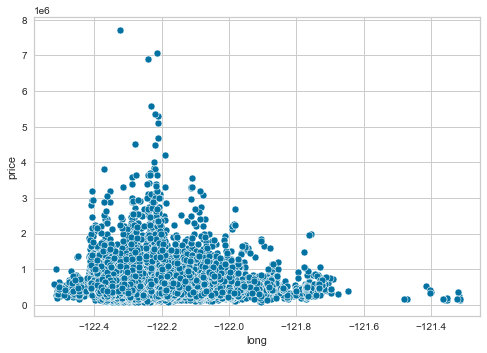

In [35]:
sns.scatterplot(house['long'], house['price']);

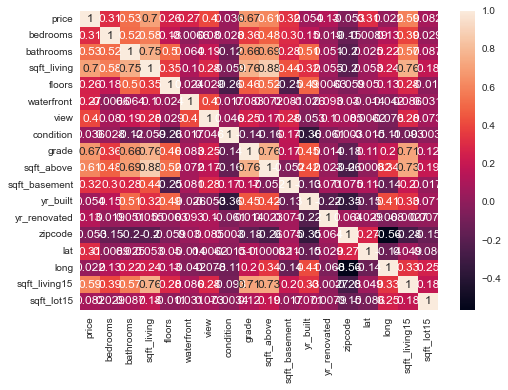

In [36]:
sns.heatmap(house.corr(), annot=True);

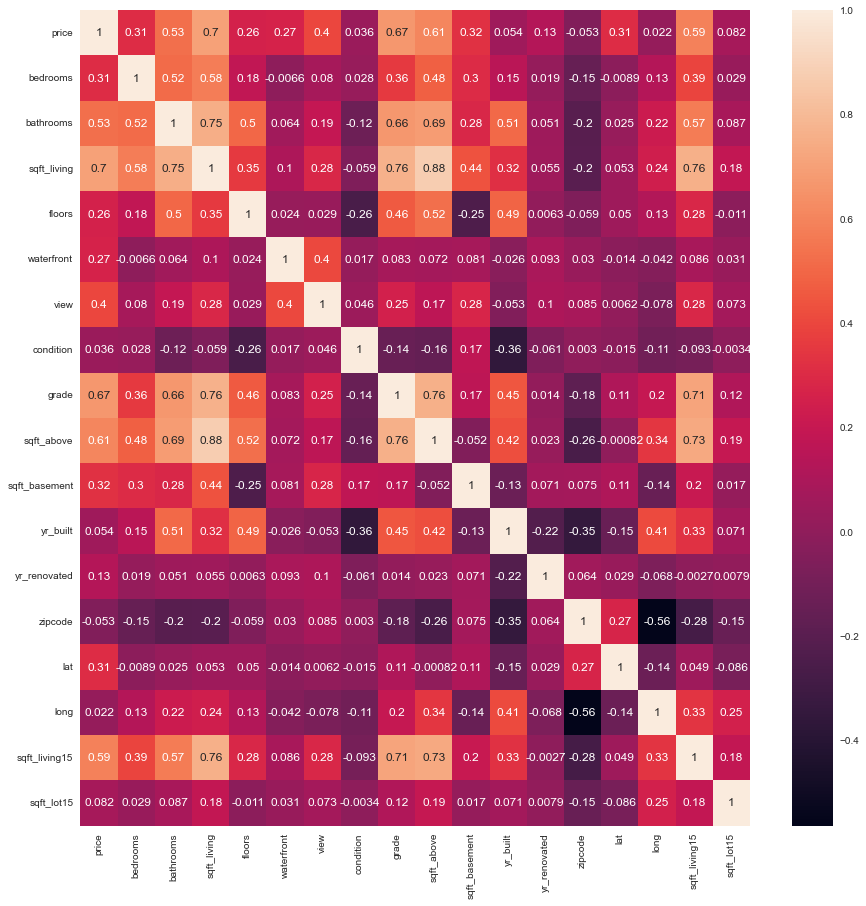

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(house.corr(), annot=True);

### Biblioteca Yellowbrick

In [38]:
!pip install yellowbrick --upgrade

In [39]:
from yellowbrick.target import FeatureCorrelation

In [40]:
# retiramos o preço do retorno da função
house.columns[1:]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (17).

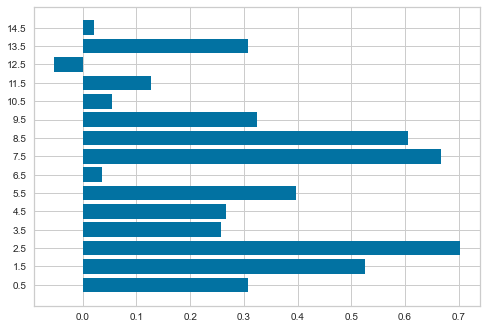

In [41]:
grafico = FeatureCorrelation(labels = house.columns[1:])
grafico.fit(house.iloc[:, 1:16].values, house.iloc[:, 0].values)
grafico.show();

- Mean Square Error (MSE)
onde N é igual ao somatório de registros

$\displaystyle MSE =  \frac{1}{N} \sum_{i=1}^N (fi - yi)^2$ 

C:\Users\Matheus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.838e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


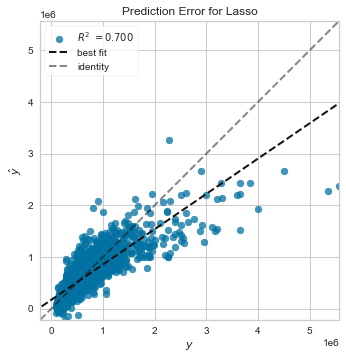

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [42]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError

# Passando os parâmetros para o modelo
X = house.iloc[:, 1:16]
y = house.iloc[:, 0]

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [43]:
# calculando o coeficiente de determinação

math.pow(0.7, 2)

0.48999999999999994

In [45]:
X = house['sqft_living'].values
X.shape

(21613,)

In [46]:
X = X.reshape(-1,1)
X.shape

(21613, 1)

In [47]:
y = house['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [48]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2,
                                                                 random_state= 1)
X_treinamento.shape, X_teste.shape

((17290, 1), (4323, 1))

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression()

In [50]:
# b0

regressor.intercept_

-30186.361061055562

In [51]:
# b1
regressor.coef_

array([273.82181112])

In [54]:
regressor.intercept_ + regressor.coef_ * 900

array([216253.26894848])

In [57]:
regressor.predict([[900]])

array([216253.26894848])

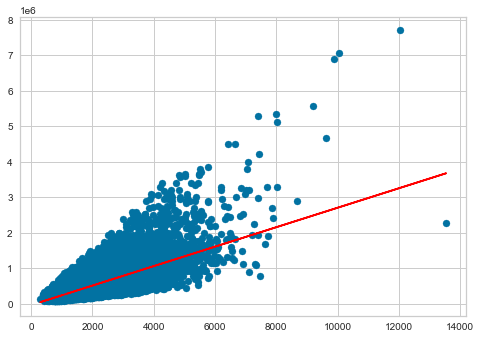

In [62]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color='red')

In [68]:
# calculando o coeficiente R²
# quanto mais próximo de 1 melhor o algoritmo

regressor.score(X_treinamento, y_treinamento)

0.48876078213887486

In [69]:
regressor.score(X_teste, y_teste)

0.5033019006466928

- Mean Absolute Error (MAE)

$\displaystyle MAE =  \frac{1}{N} \sum_{i=1}^N |yi - \hat{yi}|$ 

- Mean Square Error (MSE)
onde N é igual ao somatório de registros

$\displaystyle MSE =  \frac{1}{N} \sum_{i=1}^N (fi - \hat{yi})^2$ 

- Root mean square Error (RMSE)

$\displaystyle MSE = \sqrt { \frac{1}{N} \sum_{i=1}^N (fi - \hat{yi})^2}$ 

### Métricas de Erro

In [70]:
previsoes = regressor.predict(X_teste)

In [71]:
previsoes, y_teste

(array([ 733776.4919685 ,  416143.19106732,  618771.33129738, ...,
         449001.80840193, 1412854.58355033,  380546.3556215 ]),
 array([ 459000.,  445000., 1057000., ...,  260000., 1795000.,  418000.]))

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
mean_absolute_error(y_teste, previsoes)

178578.01159005205

In [74]:
mean_squared_error(y_teste, previsoes)

85730574276.16478

In [75]:
math.sqrt(mean_squared_error(y_teste, previsoes))

292797.83857836924

### Regressão Linear Múltipla

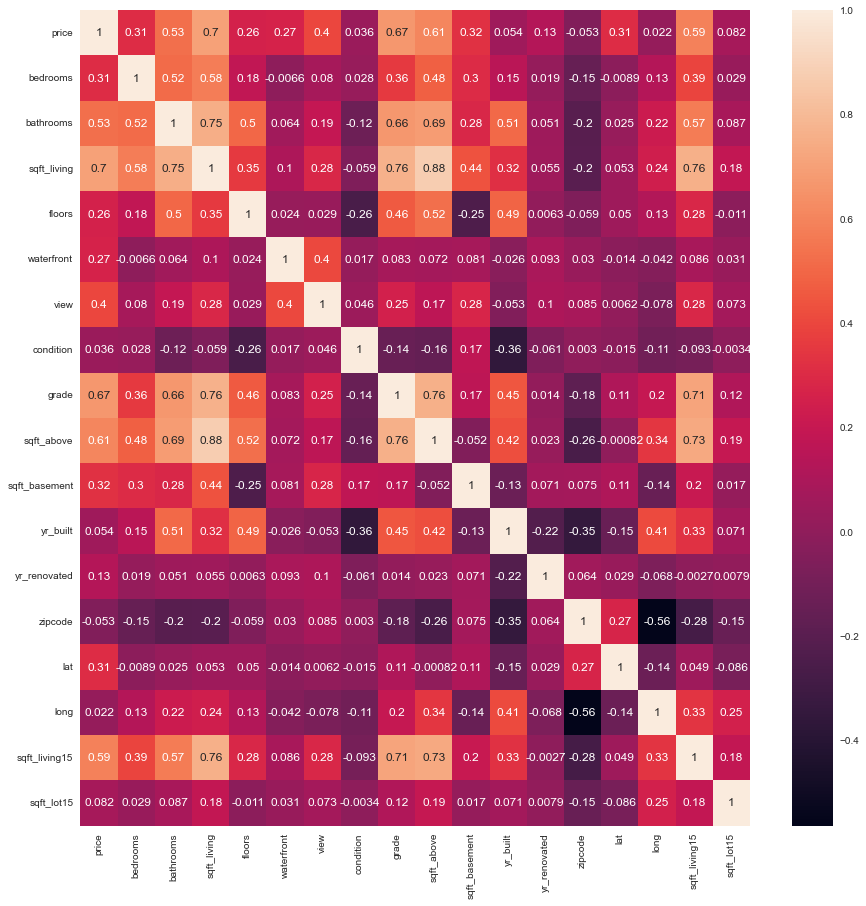

In [76]:

fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(house.corr(), annot=True);

In [77]:
house.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [103]:
# os valores dentro da lista, representam os índices das colunas
X1 = house.iloc[:, [2,3,4,5,9,10,14]].values
X1

array([[1.00000e+00, 1.18000e+03, 1.00000e+00, ..., 1.18000e+03,
        0.00000e+00, 4.75112e+01],
       [2.25000e+00, 2.57000e+03, 2.00000e+00, ..., 2.17000e+03,
        4.00000e+02, 4.77210e+01],
       [1.00000e+00, 7.70000e+02, 1.00000e+00, ..., 7.70000e+02,
        0.00000e+00, 4.77379e+01],
       ...,
       [7.50000e-01, 1.02000e+03, 2.00000e+00, ..., 1.02000e+03,
        0.00000e+00, 4.75944e+01],
       [2.50000e+00, 1.60000e+03, 2.00000e+00, ..., 1.60000e+03,
        0.00000e+00, 4.75345e+01],
       [7.50000e-01, 1.02000e+03, 2.00000e+00, ..., 1.02000e+03,
        0.00000e+00, 4.75941e+01]])

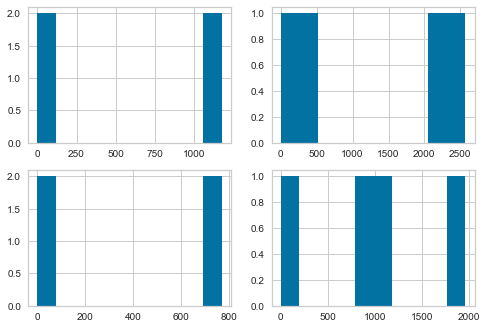

In [105]:
f, ax = plt.subplots(2, 2) # 2 linhas e 2 colunas = 4 gráficos
ax[0,0].hist(X[0])
ax[0,1].hist(X[1])
ax[1,0].hist(X[2])
ax[1,1].hist(X[3]);

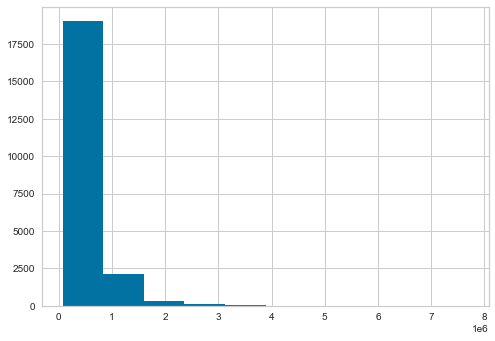

In [95]:
plt.hist(y);

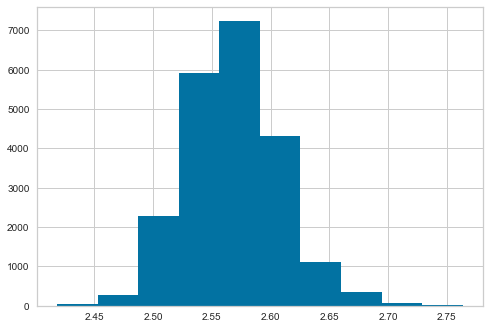

In [97]:
y = np.log(y)

plt.hist(y);

In [106]:
y = house.iloc[:, 0].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [107]:
from sklearn.model_selection import train_test_split
X1_treinamento, X1_teste, y_treinamento, y_teste = train_test_split(X1, y, test_size=0.2,
                                                                 random_state= 1)
X1_treinamento.shape, X1_teste.shape

((17290, 7), (4323, 7))

In [108]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X1_treinamento, y_treinamento)

LinearRegression()

In [109]:
regressor.score(X1_treinamento, y_treinamento)

0.6078983401075589

In [110]:
regressor.score(X1_teste, y_teste)

0.599692874655544

In [111]:
previsoes = regressor.predict(X1_teste)
mean_absolute_error(y_teste, previsoes)

152270.9484775347

In [113]:
house.drop(labels=['sqft_living15', 'sqft_lot15'], axis=1, inplace=True)
house.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [114]:
# Utilizando todos os valores 

X3 = house.iloc[:, 1:17].values
y = house.iloc[:, 0].values


In [117]:
X3_treinamento, X3_teste, y_treinamento, y_teste = train_test_split(X3, y, test_size=0.2,
                                                                 random_state= 1)
X3_treinamento.shape, X3_teste.shape

regressor = LinearRegression()
regressor.fit(X3_treinamento, y_treinamento)

LinearRegression()

In [118]:
regressor.score(X3_treinamento, y_treinamento)

0.7026943914536374

In [119]:
regressor.score(X3_teste, y_teste)

0.6840787045491836

In [120]:
# Selecionando os melhores atributos

from sklearn.feature_selection import SelectFdr, f_regression

In [125]:
selecao = SelectFdr(f_regression, alpha = 0.00)
X_novo = selecao.fit_transform(X, y)
X.shape, X_novo.shape

((21613, 4), (21613, 4))

In [126]:
selecao.pvalues_

array([0., 0., 0., 0.])

In [127]:
colunas = selecao.get_support()
colunas

array([ True,  True,  True,  True])